In [ ]:
import numpy as np
import pandas as pd
import os
import time
import pickle
import gzip

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline

from sklearn.metrics import accuracy_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Fashion MNIST dataset
- 28*28 pixels(784 차원)
- label
  - 0 T-shirt/top
  - 1 Trouser
  - 2 Pullover
  - 3 Dress
  - 4 Coat
  - 5 Sandal
  - 6 Shirt
  - 7 Sneaker
  - 8 Bag
  - 9 Ankle boot


In [115]:
#데이터 불러오기
fashion=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/[0207]_Dimensionality Reduction_실습, 과제/fashion-mnist.csv') 
fashion.head(3) #60000 rows

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0


In [ ]:
fashion.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
fashion.shape

(60000, 785)

In [ ]:
len(fashion)

60000

- (Q1) X_train, y_train, X_test, y_test 지정하기
  - 60000개의 전체 데이터셋 사용하지 않아도 됨 (학습 속도가 느려짐)
  - 본인이 생각하는 적절한 train 개수, test 개수를 설정하여 분리하도록
    - 이때 train과 test 데이터의 라벨 분포가 균등하게 이루어지도록 분리해야함(학습시에 편향되지 않도록)
    - 그래프 그려서 라벨값 분포가 균등한지 확인할 것

In [127]:
from sklearn.model_selection import train_test_split

# shuffle = False

x = fashion.drop('label', axis = 1)
y = fashion['label']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 1000, train_size = 5000, shuffle=False, random_state=1004) 
y_train = pd.Series(data=y_train)
y_test = pd.Series(data=y_test)

In [129]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,74,86,45,17,0,0,0,0
4998,0,0,0,0,0,0,0,0,3,0,...,140,79,18,0,0,0,0,0,0,0


In [130]:
y_train

0       2
1       9
2       6
3       0
4       3
       ..
4995    7
4996    7
4997    6
4998    3
4999    6
Name: label, Length: 5000, dtype: int64

In [131]:
X_test

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
5000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5001,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5003,0,0,0,0,0,0,0,0,0,0,...,99,97,99,97,0,0,0,0,0,0
5004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5996,0,0,0,0,0,0,0,0,0,80,...,82,0,0,0,0,0,0,0,0,0
5997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
y_test

5000    0
5001    4
5002    7
5003    8
5004    6
       ..
5995    7
5996    1
5997    5
5998    7
5999    3
Name: label, Length: 1000, dtype: int64

In [133]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(5000, 784)
(1000, 784)
(5000,)


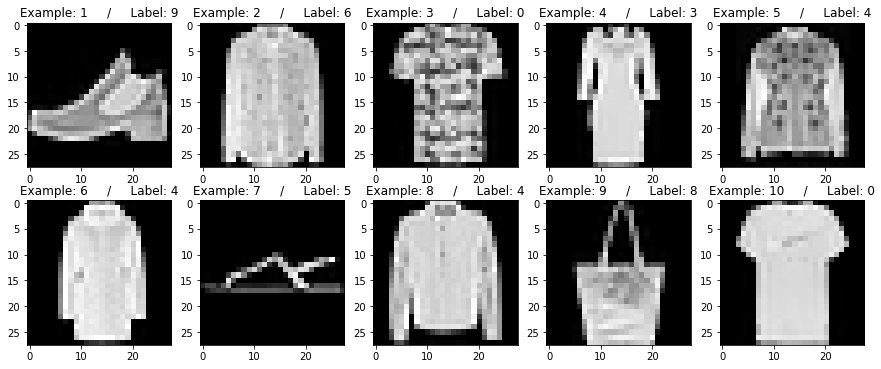

In [134]:
plt.figure(figsize=(15,6))
for i in range(1,11):
  plt.subplot(2,5,i)
  label = y_train.loc[i]
  image = X_train.loc[i,:].values.reshape([28, 28])
  plt.imshow(image, cmap=plt.get_cmap('gray'))
  plt.title('Example: %d     /     Label: %d'%(i, label))

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


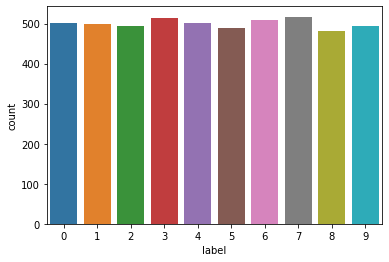

In [135]:
#train dataset으로 5000개만 사용
X_train=X_train.loc[:4999,:]
y_train=y_train[:5000]
sns.countplot(y_train) #y라벨이 균등하게 분포하는지 확인
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


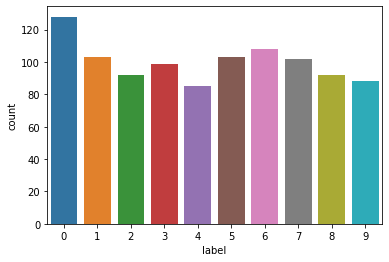

In [136]:

sns.countplot(y_test)
plt.show()

- 어떻게 생긴 데이터셋인지 확인해보기

In [137]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(5000, 784) (5000,) (1000, 784) (1000,)


# PCA를 활용해 성능 높여보기


In [138]:
from sklearn.decomposition import PCA
pca=PCA(n_components=784) #784차원의 잠재변수
X_train_PCA=pca.fit_transform(X_train)
X_train_PCA.shape

(5000, 784)

- (Q2) 합리적인 잠재변수 개수 설정하기
  - PCA에서 각 잠재변수가 설명하는 분산 비율을 보고 적절한 잠재변수 개수 설정
  - 개수 설정 기준은 본인 재량. 다만, 명확한 기준을 서술할 것.

잠재변수 23개쓰면 전체 데이터 분산의 80% 이상을 설명

$ \therefore $  잠재변수 개수 23개 !

In [139]:
pca.explained_variance_ratio_[:10]

array([0.28911501, 0.17643681, 0.06015456, 0.05078552, 0.03915467,
       0.03488659, 0.0228115 , 0.01931853, 0.0139818 , 0.01294042])

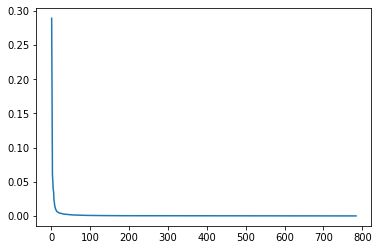

In [97]:
plt.plot(range(1,785),pca.explained_variance_ratio_)
plt.show()

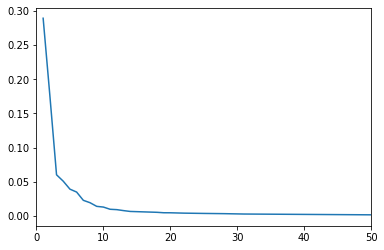

In [ ]:
plt.plot(range(1,785),pca.explained_variance_ratio_)
plt.xlim(0,50)
plt.show()

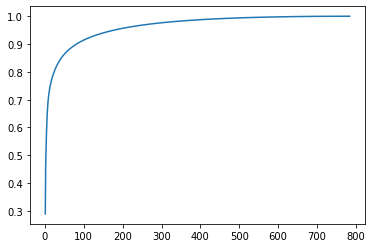

In [ ]:
cumulative = []
temp = 0
for i in range(0, 784):
    temp += pca.explained_variance_ratio_[i]
    cumulative.append(temp)

plt.plot(range(1,785),cumulative)
plt.show()

In [140]:
for i in [10,20,50,100,784]:
  explained=np.sum(pca.explained_variance_ratio_[:i])
  print(i,'개의 잠재변수가 설명하는 분산은 전체 데이터의 {:.2f}%'.format(explained*100))

10 개의 잠재변수가 설명하는 분산은 전체 데이터의 71.96%
20 개의 잠재변수가 설명하는 분산은 전체 데이터의 78.51%
50 개의 잠재변수가 설명하는 분산은 전체 데이터의 86.36%
100 개의 잠재변수가 설명하는 분산은 전체 데이터의 91.44%
784 개의 잠재변수가 설명하는 분산은 전체 데이터의 100.00%


In [141]:
cumulative=np.array(cumulative)
np.where(cumulative>0.8)[0][0] 

23

- (Q3) 학습속도, 성능의 향상을 보이는지 확인
  - 기존에 배웠던 여러가지 classification model들 활용하기
  - 최소한 1가지 이상의 모델에 대해 비교해보고 차원축소 이전, 이후 어떠한 차이를 보이는지 서술


In [142]:
#pca를 통한 특징 추출 과정에서는 y라벨을 사용하지X(unsupervised)
#성능 확인 과정에서 y라벨이 사용됨
pca=PCA(n_components=23) # 축소
X_train_PCA=pca.fit_transform(X_train) #train은 fit + transform
X_test_PCA = pca.transform(X_test)       #test는 transform
print('Original space:',X_train.shape)
print('After PCA:',X_train_PCA.shape)

Original space: (5000, 784)
After PCA: (5000, 23)


In [143]:
# rogistic regression 

#차원축소 이전(origianl 공간 784차원)
start=time.time()
logistic_original=LogisticRegression(max_iter=1000) #warning 메시지가 나와서 max_iter 지정해줌
logistic_original.fit(X_train, y_train)  #train set만 고려
print('train accuracy:',accuracy_score(y_train, logistic_original.predict(X_train)))
print('test accuracy:',accuracy_score(y_test, logistic_original.predict(X_test)))
print(f'{time.time()-start:.4f}sec')

train accuracy: 1.0
test accuracy: 0.788
44.0070sec


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [144]:
#차원축소 이후(23차원)
start=time.time()
logistic_pca=LogisticRegression(max_iter=1000) 
logistic_pca.fit(X_train_PCA,y_train)
print('train accuracy:',accuracy_score(y_train, logistic_pca.predict(X_train_PCA)))
print('test accuracy:',accuracy_score(y_test, logistic_pca.predict(X_test_PCA)))
print(f'{time.time()-start:.4f}sec')

train accuracy: 0.8204
test accuracy: 0.802
7.6785sec


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


학습 속도가 확연히 개선됨

정확도가 더 향상됨.


# 2차원으로 시각화
- (Q4) 여러가지 차원 축소 방법 중 적절할 것으로 예상되는 방법 최소한 3가지 이용해서 시각화해보기
  - 하나의 차원 축소 방법도 하이퍼파라미터의 설정 다양하게 해보기
  - ex) KPCA에서 다양한 커널 함수 사용, ISOMAP or LLE에서 고려할 이웃의 개수 변경해보기

PCA

In [145]:
start=time.time()
pca=PCA(n_components=2)
X_train_PCA=pca.fit_transform(X_train) 
print(f'{time.time()-start:.4f}sec')

0.5230sec


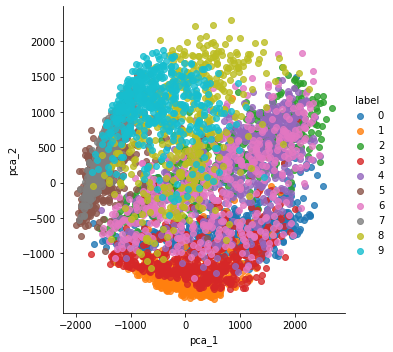

In [146]:
X_train_pca=pd.DataFrame(X_train_PCA).loc[:,0:1]
X_train_pca=pd.concat((X_train_pca, y_train), axis=1) 
X_train_pca.columns=['pca_1', 'pca_2', 'label']

sns.lmplot(x='pca_1',y='pca_2',data=X_train_pca,hue='label',fit_reg=False)

plt.show()

KPCA

In [153]:
from sklearn.decomposition import KernelPCA
start=time.time()
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True) # 가우시안 방사형 커널 사용
X_train_rbf_pca=rbf_pca.fit_transform(X_train)
print(f'{time.time()-start:.4f}sec')

11.0584sec


In [154]:
start=time.time()
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True) #시그모이드 커널 사용
X_train_sig_pca=sig_pca.fit_transform(X_train)
#X_test_rbf_pca=sig_pca.fit_transform(X_test)
print(f'{time.time()-start:.4f}sec')

10.6430sec


In [164]:
start=time.time()
linear_pca = KernelPCA(n_components = 2, kernel="linear", gamma=0.0001, fit_inverse_transform=True) # 다항 커널 사용
X_train_linear_pca=linear_pca.fit_transform(X_train)
print(f'{time.time()-start:.4f}sec')

8.7036sec


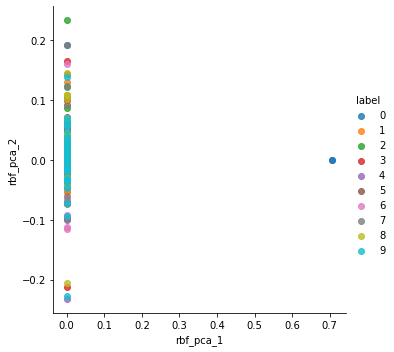

In [155]:
X_train_rbf_pca=pd.DataFrame(X_train_rbf_pca).loc[:,0:1]
X_train_rbf_pca=pd.concat((X_train_rbf_pca, y_train), axis=1) 
X_train_rbf_pca.columns=['rbf_pca_1', 'rbf_pca_2', 'label']

sns.lmplot(x='rbf_pca_1',y='rbf_pca_2',data=X_train_rbf_pca,hue='label',fit_reg=False)
plt.show()

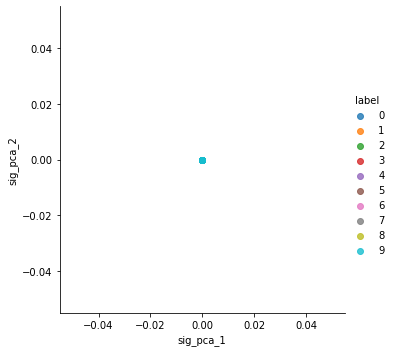

In [157]:
X_train_sig_pca=pd.DataFrame(X_train_sig_pca).loc[:,0:1]
X_train_sig_pca=pd.concat((X_train_sig_pca, y_train), axis=1) 
X_train_sig_pca.columns=['sig_pca_1', 'sig_pca_2', 'label']

sns.lmplot(x='sig_pca_1',y='sig_pca_2',data=X_train_sig_pca,hue='label',fit_reg=False)
plt.show()

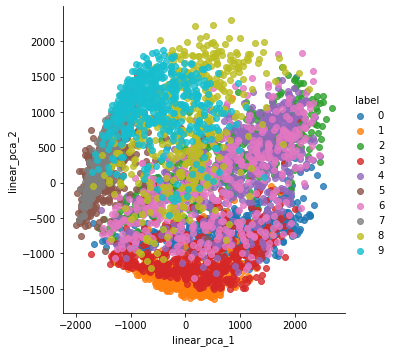

In [165]:
X_train_linear_pca=pd.DataFrame(X_train_linear_pca).loc[:,0:1]
X_train_linear_pca=pd.concat((X_train_linear_pca, y_train), axis=1) 
X_train_linear_pca.columns=['linear_pca_1', 'linear_pca_2', 'label']

sns.lmplot(x='linear_pca_1',y='linear_pca_2',data=X_train_linear_pca,hue='label',fit_reg=False)
plt.show()

isomap 

In [166]:
from sklearn.manifold import Isomap
start=time.time()
isomap=Isomap(n_neighbors=5,n_components=2,n_jobs=4)   #고려할 이웃의 수. 이웃의 수를 바꿔가며 언제 차원축소가 가장 잘 되는지지확인 가능      
X_train_isomap=isomap.fit_transform(X_train)
print(f'{time.time()-start:.4f}sec')

22.9624sec


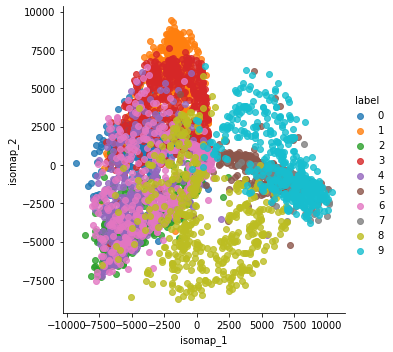

In [167]:
X_train_isomap=pd.DataFrame(X_train_isomap).loc[:,0:1]
X_train_isomap=pd.concat((X_train_isomap, y_train), axis=1) 
X_train_isomap.columns=['isomap_1', 'isomap_2', 'label']

sns.lmplot(x='isomap_1',y='isomap_2',data=X_train_isomap,hue='label',fit_reg=False)
plt.show()

In [170]:
start=time.time()
isomap10=Isomap(n_neighbors=10,n_components=2,n_jobs=4)   #고려할 이웃의 수. 이웃의 수를 바꿔가며 언제 차원축소가 가장 잘 되는지지확인 가능      
X_train_isomap10=isomap10.fit_transform(X_train)
print(f'{time.time()-start:.4f}sec')

41.4482sec


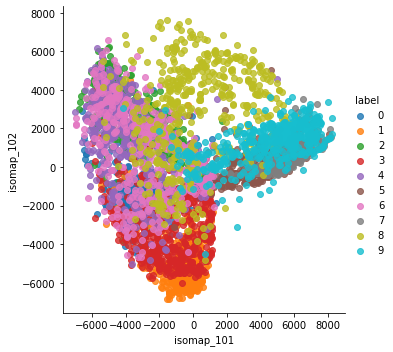

In [172]:
X_train_isomap10=pd.DataFrame(X_train_isomap10).loc[:,0:1]
X_train_isomap10=pd.concat((X_train_isomap10, y_train), axis=1) 
X_train_isomap10.columns=['isomap_101', 'isomap_102', 'label']

sns.lmplot(x='isomap_101',y='isomap_102',data=X_train_isomap10,hue='label',fit_reg=False)
plt.show()

t-SNE


In [168]:
from sklearn.manifold import TSNE
start=time.time()
tsne = TSNE(n_components=2, random_state=42) #4미만의 공간으로
X_train_tsne = tsne.fit_transform(X_train)
print(f'{time.time()-start:.4f}sec')

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


64.1180sec


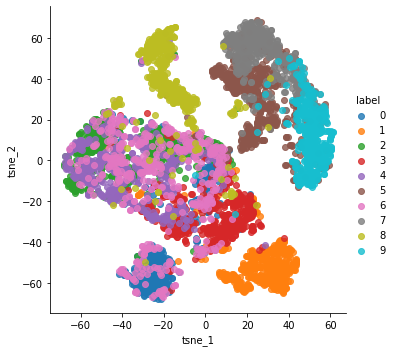

In [169]:
X_train_tsne=pd.DataFrame(X_train_tsne).loc[:,0:1]
X_train_tsne=pd.concat((X_train_tsne, y_train), axis=1) 
X_train_tsne.columns=['tsne_1', 'tsne_2', 'label']
X_train_tsne

sns.lmplot(x='tsne_1',y='tsne_2',data=X_train_tsne,hue='label',fit_reg=False)
plt.show()

- (Q5) 시도해본 차원축소 방법 중 Fashion MNIST 데이터셋을 가장 잘 시각화하는 것으로 보이는 방법은 무엇인지 서술해보자.

- 그나마 t-SNE가 가장 잘 시각화한것같다. 

- (Q6) 저차원에서 제대로 분류가 잘 되지 않는 라벨은 무엇인지 언급해보고, 왜 제대로 분류되지 않을 것인지 추측해보자.

- 4번, 6번이 가장 겹쳐있는 것 같다. 분류되지 않은 이유는 두 라벨이 겹치는 부분이 많아서일까..??

수고하셨습니다~